In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import pickle

# Importando variáveis de treino e teste desenvolvidos na etapa de preparação dos dados

In [2]:
def open_train_test():
  with open('train_test.pkl','rb') as f:
    return pickle.load(f)

In [3]:
X_train, X_test, y_train, y_test = open_train_test()

# GridSearchCV
O GridSearchCV é um módulo do Scikit Learn e é amplamente usado para automatizar grande parte do processo de tuning. O objetivo primário do GridSearchCV é a criação de combinações de parâmetros para posteriormente avaliá-las.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

Vamos visualizar os resultados dos testes utitlizando 4 métricas diferentes  
- **Precision**: é usada para medir o desempenho do modelo ao medir a contageem de positivos verdadeiros da maneira correta de todas as previsões positivas feitas.
- **Recall**: é usada para medir o desempenho do modelo ao medir a contagem de positivos verdadeiros de maneira correta de todos os valores posititvos reais.
- **Precision**: é usada para medir o desempenho do modelo ao medir a razão da soma de positivos verdadeiros e verdadeiros negativos de todas as previsões
- **F1-score**: é a média harmônica de precision e recall e é usada como uma métrica nos cenários em que a escolha de precisão ou pontuação de recall pode resultar em comprometimento em termos de modelo dando altos falsos positivos e falsos negativos, respectivamente.

In [5]:
metrics = {'accuracy' :make_scorer(accuracy_score),
           'recall'   :make_scorer(recall_score),
           'precision':make_scorer(precision_score),
           'f1'       :make_scorer(fbeta_score, beta = 1)}

## Cross Validation
O Cross validation cria várias combinações diferentes para treino e teste, o que torna o resultado das métricas mais preciso e condizente com o desempenho real do algoritmo.  

Para definir o número de CV no nosso algoritmo, vamos utilizar o StratifiedShuffleSplit, que fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

cv_sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)

# Rede Neural



## Teste 1
Na primeira etapa de teste da Rede Neural, vamos utilizar o conjunto dos parâmetros possíveis para esse modelo. A partir dos resultados obtidos, vamos realizar o afunilamento de parâmetros para extrair a melhor combinação possível

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier() #MLPClassifier(random_state=seed, alpha=1e-5)

In [8]:
mlp_parameters = {
       'solver': ['lbfgs', 'adam', 'sgd']
      ,'activation': ['identity', 'tanh', 'logistic','relu']
      ,'hidden_layer_sizes': [(14, 7, 2, 7, 14), (14, 2, 14), (8, 16, 32), (2, 4, 8, 16), (20, 10, 20)]
      ,'learning_rate':  ['constant', 'adaptive', 'invscaling']
}

In [9]:
def mlp_count(df, count = False, **kargs):
  sol, act, hid_la_s, le_ra = dict(), dict(), dict(), dict()

  for param in kargs['solver']:
    sol[param] = 0
  
  for param in kargs['activation']:
    act[param] = 0
  
  for param in kargs['hidden_layer_sizes']:
    hid_la_s[param] = 0
  
  for param in kargs['learning_rate']:
    le_ra[param] = 0

  mlp_params_count = {
        'solver': sol
      , 'activation': act
      , 'hidden_layer_sizes': hid_la_s
      , 'learning_rate': le_ra
  }

  if not count:
    count = df.shape[0]

  for i in range(count):
    solver             = df['params'][i]['solver']
    activation         = df['params'][i]['activation']
    hidden_layer_sizes = df['params'][i]['hidden_layer_sizes']
    learning_rate      = df['params'][i]['learning_rate']

    mlp_params_count['solver'][solver] += 1
    mlp_params_count['activation'][activation] += 1
    mlp_params_count['hidden_layer_sizes'][hidden_layer_sizes] += 1
    mlp_params_count['learning_rate'][learning_rate] += 1

  return mlp_params_count

In [10]:
%%capture
test_1_mlp = GridSearchCV(estimator = mlp,
                      param_grid = mlp_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_1_mlp.fit(X_train, y_train)

In [11]:
df_mlp_1 = pd.DataFrame(test_1_mlp.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_mlp_1.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)
df_mlp_1.reset_index(drop=True, inplace=True)

In [12]:
print(f"Verificando os 5 melhores resultados das {df_mlp_1.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 180 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [13]:
df_mlp_1.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'activation': 'relu', 'hidden_layer_sizes': (...",1,4,37,7,0.752625,0.734928,0.761291,0.747788
1,"{'activation': 'relu', 'hidden_layer_sizes': (...",2,3,41,4,0.754535,0.729426,0.767178,0.747676
2,"{'activation': 'tanh', 'hidden_layer_sizes': (...",3,1,51,1,0.755847,0.721531,0.774109,0.746758
3,"{'activation': 'tanh', 'hidden_layer_sizes': (...",4,2,48,2,0.755728,0.722967,0.773969,0.746755
4,"{'activation': 'tanh', 'hidden_layer_sizes': (...",5,4,44,5,0.752625,0.725598,0.766649,0.745090


### Realizando a contagem dos parâmetros que foram utitlizados nas 10 melhores classificações

In [14]:
mlp_count(df = df_mlp_1, count = 10
          , solver = mlp_parameters['solver']
          , activation = mlp_parameters['activation']
          , hidden_layer_sizes = mlp_parameters['hidden_layer_sizes']
          , learning_rate = mlp_parameters['learning_rate'])

{'activation': {'identity': 0, 'logistic': 0, 'relu': 5, 'tanh': 5},
 'hidden_layer_sizes': {(2, 4, 8, 16): 0,
  (8, 16, 32): 2,
  (14, 2, 14): 0,
  (14, 7, 2, 7, 14): 0,
  (20, 10, 20): 8},
 'learning_rate': {'adaptive': 4, 'constant': 2, 'invscaling': 4},
 'solver': {'adam': 2, 'lbfgs': 8, 'sgd': 0}}

## Teste 2
Vamos utitlizar os parâmetros mais recorrentes nas melhores classificações e realizar uma segunda rodada de testes para determinar a melhor combinação de parâmetros

In [17]:
mlp_parameters = {
       'solver': ['lbfgs']
      ,'activation': ['tanh','relu']
      ,'hidden_layer_sizes': [(20, 10, 20), (8, 12), (12, 8), (20, 12, 8)]
      ,'learning_rate':  ['adaptive', 'invscaling']
}

In [18]:
%%capture
test_2_mlp = GridSearchCV(estimator = mlp,
                      param_grid = mlp_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_2_mlp.fit(X_train, y_train)

In [19]:
df_mlp_2 = pd.DataFrame(test_2_mlp.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_mlp_2.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)
df_mlp_2.reset_index(drop=True, inplace=True)

In [20]:
print(f"Verificando os 5 melhores resultados das {df_mlp_2.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 16 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [21]:
df_mlp_2.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'activation': 'tanh', 'hidden_layer_sizes': (...",1,1,5,4,0.757637,0.728230,0.773590,0.749838
1,"{'activation': 'relu', 'hidden_layer_sizes': (...",2,8,3,11,0.752148,0.737321,0.759572,0.747913
2,"{'activation': 'relu', 'hidden_layer_sizes': (...",3,3,7,5,0.754773,0.725120,0.770427,0.746617
3,"{'activation': 'relu', 'hidden_layer_sizes': (...",4,7,4,9,0.752625,0.728708,0.765348,0.746159
4,"{'activation': 'tanh', 'hidden_layer_sizes': (...",5,4,9,6,0.753461,0.722249,0.770377,0.745043


In [22]:
mlp_count(df = df_mlp_2, count = 10
          , solver = mlp_parameters['solver']
          , activation = mlp_parameters['activation']
          , hidden_layer_sizes = mlp_parameters['hidden_layer_sizes']
          , learning_rate = mlp_parameters['learning_rate'])

{'activation': {'relu': 4, 'tanh': 6},
 'hidden_layer_sizes': {(8, 12): 1,
  (12, 8): 3,
  (20, 10, 20): 3,
  (20, 12, 8): 3},
 'learning_rate': {'adaptive': 5, 'invscaling': 5},
 'solver': {'lbfgs': 10}}

In [23]:
mlp_best_param = df_mlp_2['params'][0]

In [24]:
solver              = mlp_best_param['solver']
activation          = mlp_best_param['activation']
hidden_layer_sizes  = mlp_best_param['hidden_layer_sizes']
learning_rate       = mlp_best_param['learning_rate']
mlp_best_param

{'activation': 'tanh',
 'hidden_layer_sizes': (20, 10, 20),
 'learning_rate': 'invscaling',
 'solver': 'lbfgs'}

# Classificação com os melhores parâmetros

In [25]:
mlp = mlp = MLPClassifier(solver = solver, activation = activation, hidden_layer_sizes = hidden_layer_sizes, learning_rate = learning_rate)
mlp.fit(X_train, y_train);
y_pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
print('1: Masculino\n2: Feminino\n',classification_report(y_test, y_pred))

1: Masculino
2: Feminino
               precision    recall  f1-score   support

           1       0.79      0.76      0.78       704
           2       0.76      0.80      0.78       692

    accuracy                           0.78      1396
   macro avg       0.78      0.78      0.78      1396
weighted avg       0.78      0.78      0.78      1396



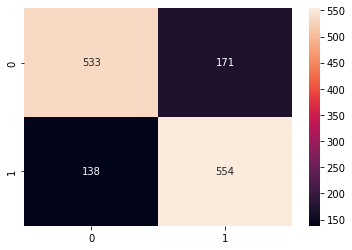

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

# Exportando modelo treinado

In [28]:
path = '/content/drive/MyDrive/Mineração de Dados/IF998 - Missões SMD/Projeto/'
with open(path+'MLP_model.pkl', 'wb') as f:
    pickle.dump([mlp], f) 